<a href="https://colab.research.google.com/github/Rogerio-mack/ABCXYZ/blob/main/Fiat_ABCXYZ_ARIMA_20221010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<br>
<br>
<br>
<br>
<br>

# ARIMA Forecast
---

In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 38.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Aquisição e Transformações dos Dados



In [3]:
df = pd.read_excel('https://github.com/Rogerio-mack/ABCXYZ/raw/main/BASE_TCC_revisado_20221010.xlsx')
df.head()

,PRODUTO,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,Total Geral,CV,R²
0,MOBI LIKE 1.,188.0,231.0,191.0,132.0,293.0,284.0,213.0,291.0,275.0,...,195,219,22,262,197,127,153,1435,0.357870,0.582854
1,FIORINO 1.4 FLEX,58.0,66.0,75.0,56.0,124.0,127.0,1.0,143.0,17.0,...,124,131,96,11,82,65,79,5569,0.382212,0.334359
2,CRONOS DRIVE 1.3,1.0,95.0,64.0,69.0,64.0,56.0,41.0,34.0,41.0,...,36,5,48,71,47,47,4,2419,0.414644,0.114759
3,ARGO DRIVE 1.,118.0,14.0,155.0,12.0,119.0,125.0,13.0,151.0,7.0,...,98,139,127,19,67,72,99,77,0.429828,0.164686
4,PULSE IMPETUS TF2 CVT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43,1,83,93,8,66,84,929,0.437519,0.217998


In [4]:
df.columns

Index([    'PRODUTO',             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,         '1.1',            11,
                  12,            13,            14,            15,
                  16,            17,            18,            19,
               '2.1',            21,            22,            23,
                  24,            25,            26,            27,
                  28,            29,         '3.1',            31,
                  32,            33,            34,            35,
                  36,            37,            38,            39,
               '4.1',            41,            42,            43,
                  44,            45,            46,            47,
                  48, 'Total Geral',          'CV',          'R²'],
      dtype='object')

In [5]:
df = df.drop(columns=[ 'R²', 'CV','Total Geral'])
df.head()

,PRODUTO,1,2,3,4,5,6,7,8,9,...,39,4.1,41,42,43,44,45,46,47,48
0,MOBI LIKE 1.,188.0,231.0,191.0,132.0,293.0,284.0,213.0,291.0,275.0,...,34.0,147.0,183,195,219,22,262,197,127,153
1,FIORINO 1.4 FLEX,58.0,66.0,75.0,56.0,124.0,127.0,1.0,143.0,17.0,...,96.0,63.0,15,124,131,96,11,82,65,79
2,CRONOS DRIVE 1.3,1.0,95.0,64.0,69.0,64.0,56.0,41.0,34.0,41.0,...,6.0,37.0,52,36,5,48,71,47,47,4
3,ARGO DRIVE 1.,118.0,14.0,155.0,12.0,119.0,125.0,13.0,151.0,7.0,...,127.0,12.0,99,98,139,127,19,67,72,99
4,PULSE IMPETUS TF2 CVT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,133.0,13.0,117,43,1,83,93,8,66,84


In [6]:
np.matrix(df.drop(columns='PRODUTO'))

matrix([[188., 231., 191., ..., 197., 127., 153.],
        [ 58.,  66.,  75., ...,  82.,  65.,  79.],
        [  1.,  95.,  64., ...,  47.,  47.,   4.],
        ...,
        [ nan,  nan,  nan, ...,  36.,  78.,  92.],
        [ nan,  nan,  nan, ...,   5.,  68.,  75.],
        [ nan,  nan,  nan, ...,  99.,  66.,  91.]])

In [7]:
np.matrix(df.drop(columns='PRODUTO')).T

matrix([[188.,  58.,   1., ...,  nan,  nan,  nan],
        [231.,  66.,  95., ...,  nan,  nan,  nan],
        [191.,  75.,  64., ...,  nan,  nan,  nan],
        ...,
        [197.,  82.,  47., ...,  36.,   5.,  99.],
        [127.,  65.,  47., ...,  78.,  68.,  66.],
        [153.,  79.,   4., ...,  92.,  75.,  91.]])

In [8]:
df_new = pd.DataFrame(np.matrix(df.drop(columns='PRODUTO')).T)
df_new.columns = df.PRODUTO.values

df_new.head()

,MOBI LIKE 1.,FIORINO 1.4 FLEX,CRONOS DRIVE 1.3,ARGO DRIVE 1.,PULSE IMPETUS TF2 CVT,ARGO TREKKING 1.3,TORO RANCH 2. D AT9,TORO VOLCANO 2. DSAT9,ARGO 1.,DUCATO CHASSI L,...,TORO VOLCANO 1.3T AT6,TORO FREEDOM 1.3T AT6,DUCATO MAXIMULTI,NOVA STRADA FREEDOM CD 1.3,TORO ENDURANCE 1.3T AT6,PULSE AUDACE 1.T CVT,PULSE DRIVE 1.T CVT,PULSE DRIVE 1.3 CVT,PULSE 1.3 MT,NOVA STRADA RANCH CD 1.3CVT
0,188.0,58.0,1.0,118.0,NaN,NaN,1.0,27.0,169.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,231.0,66.0,95.0,14.0,NaN,NaN,1.0,3.0,15.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,191.0,75.0,64.0,155.0,NaN,NaN,5.0,19.0,142.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,132.0,56.0,69.0,12.0,NaN,NaN,6.0,1.0,86.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,293.0,124.0,64.0,119.0,NaN,NaN,6.0,23.0,25.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df_new

In [10]:
start='9/1/2018'
end='8/31/2022' 
freq='MS'
index_dates = pd.date_range(start=start, end=end, freq=freq)
index_dates


DatetimeIndex(['2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01'],
              dtype='datetime64[ns]', freq='MS')

In [11]:
df.index = index_dates
df.rename(columns={'PRODUTO':''})

df.head()

,MOBI LIKE 1.,FIORINO 1.4 FLEX,CRONOS DRIVE 1.3,ARGO DRIVE 1.,PULSE IMPETUS TF2 CVT,ARGO TREKKING 1.3,TORO RANCH 2. D AT9,TORO VOLCANO 2. DSAT9,ARGO 1.,DUCATO CHASSI L,...,TORO VOLCANO 1.3T AT6,TORO FREEDOM 1.3T AT6,DUCATO MAXIMULTI,NOVA STRADA FREEDOM CD 1.3,TORO ENDURANCE 1.3T AT6,PULSE AUDACE 1.T CVT,PULSE DRIVE 1.T CVT,PULSE DRIVE 1.3 CVT,PULSE 1.3 MT,NOVA STRADA RANCH CD 1.3CVT
2018-09-01,188.0,58.0,1.0,118.0,NaN,NaN,1.0,27.0,169.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-01,231.0,66.0,95.0,14.0,NaN,NaN,1.0,3.0,15.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-01,191.0,75.0,64.0,155.0,NaN,NaN,5.0,19.0,142.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-01,132.0,56.0,69.0,12.0,NaN,NaN,6.0,1.0,86.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01,293.0,124.0,64.0,119.0,NaN,NaN,6.0,23.0,25.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.isnull().sum()

MOBI LIKE 1.                      0
FIORINO 1.4 FLEX                  0
CRONOS DRIVE 1.3                  0
ARGO DRIVE 1.                     0
PULSE IMPETUS TF2 CVT            38
ARGO TREKKING 1.3                 7
TORO RANCH 2. D AT9               0
TORO VOLCANO 2. DSAT9             0
ARGO 1.                           0
DUCATO CHASSI L                   0
NOVA STRADA FREEDOM CS 1.3       21
NOVA STRADA VOLCANO CD 1.3CVT    22
ARGO DRIVE 1.3                    0
CRONOS 1.3                        0
TORO ULTRA 2. DS AT9             16
TORO FREEDOM 2. DSAT9            10
MOBI TREKKING 1.                 26
NOVA STRADA ENDURANCE 1.4        22
TORO VOLCANO 1.3T AT6            32
TORO FREEDOM 1.3T AT6            32
DUCATO MAXIMULTI                  5
NOVA STRADA FREEDOM CD 1.3       22
TORO ENDURANCE 1.3T AT6          32
PULSE AUDACE 1.T CVT             38
PULSE DRIVE 1.T CVT              38
PULSE DRIVE 1.3 CVT              38
PULSE 1.3 MT                     38
NOVA STRADA RANCH CD 1.3CVT 

In [13]:
print( df.shape )
# df = df.dropna(axis=1)
# print( df.shape )

(48, 28)


In [14]:
df.head()

,MOBI LIKE 1.,FIORINO 1.4 FLEX,CRONOS DRIVE 1.3,ARGO DRIVE 1.,PULSE IMPETUS TF2 CVT,ARGO TREKKING 1.3,TORO RANCH 2. D AT9,TORO VOLCANO 2. DSAT9,ARGO 1.,DUCATO CHASSI L,...,TORO VOLCANO 1.3T AT6,TORO FREEDOM 1.3T AT6,DUCATO MAXIMULTI,NOVA STRADA FREEDOM CD 1.3,TORO ENDURANCE 1.3T AT6,PULSE AUDACE 1.T CVT,PULSE DRIVE 1.T CVT,PULSE DRIVE 1.3 CVT,PULSE 1.3 MT,NOVA STRADA RANCH CD 1.3CVT
2018-09-01,188.0,58.0,1.0,118.0,NaN,NaN,1.0,27.0,169.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-01,231.0,66.0,95.0,14.0,NaN,NaN,1.0,3.0,15.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-01,191.0,75.0,64.0,155.0,NaN,NaN,5.0,19.0,142.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-01,132.0,56.0,69.0,12.0,NaN,NaN,6.0,1.0,86.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01,293.0,124.0,64.0,119.0,NaN,NaN,6.0,23.0,25.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualizando as demandas

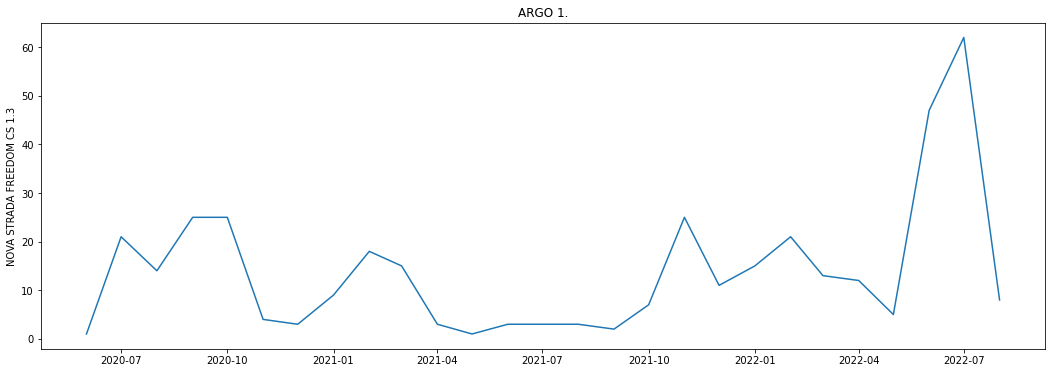

In [15]:
plt.figure( figsize=(18,6))

sns.lineplot( x=df.index, y=df[ df.columns[ 10 ] ] )
plt.title( df.columns[ 8 ] )

plt.show()

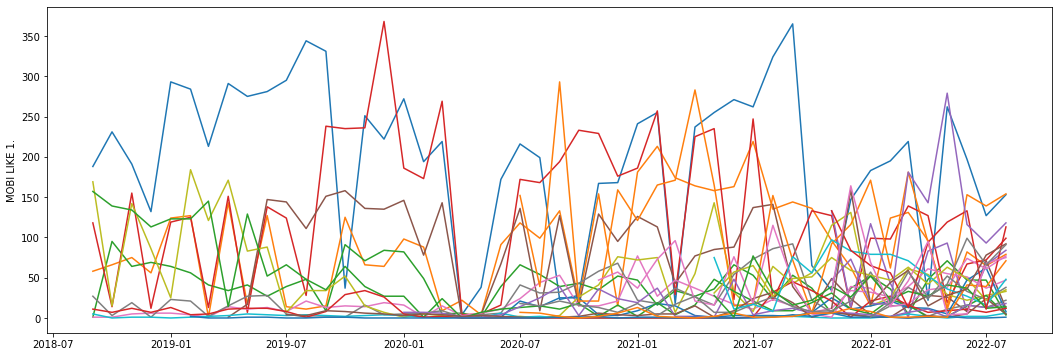

In [16]:
plt.figure( figsize=(18,6))

for PRODUTO in df:
  sns.lineplot( x=df.index, y=df[PRODUTO] )

plt.show()

# Modelo ARIMA

In [17]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [18]:
PRODUTO = df.columns[0]

model = pm.auto_arima(df[PRODUTO], seasonal=True, m=4)


In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -285.014
Date:                Mon, 10 Oct 2022   AIC                            576.027
Time:                        18:53:38   BIC                            581.641
Sample:                    09-01-2018   HQIC                           578.149
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    195.3984     20.581      9.494      0.000     155.060     235.736
ma.L1          0.2865      0.138      2.080      0.038       0.017       0.556
sigma2      8399.3709   2317.474      3.624      0.000    3857.205    1.29e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.23
Prob(Q):                              0.95   Prob(JB):                         0.12
Heteroskedasticity (H):               1.14   Skew:                            -0.71
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
model.aic()

576.0274759934124

# AIC

O Akaike Information Critera (AIC) é uma medida empregada para avaliar modelos estatísticos de previsão. Ele basicamente quantifica a qualidade do ajuste e a simplicidade/parcimônia do modelo em uma única estatística.

Ao comparar dois modelos, o de menor AIC geralmente é 'melhor'.

In [21]:
AIC_list = []
AIC_produto_list = []
min_entries = 18
np.random.seed(1)

# for produto in df:                                                                  # run for All entries
for produto in df.columns[ np.random.random_integers(0,len( df.columns )-1,25) ]:     # run for 25 random entries
  
  # skip entries with few data
  AIC_produto_list.append(produto)
  if len(df[produto].dropna()) < min_entries:
    print(produto, ' has skipped, it has only ', len(df[produto].dropna()), ' data entries. Less than minimum ', min_entries)
    AIC_list.append(-1)
    continue
  print(produto, ' looking arima model for ', len(df[produto].dropna()), ' data entries')
  
  # run arima
  try:
    model = pm.auto_arima(df[produto].dropna(), information_criterion='aic', seasonal=True, m=12)
    AIC_list.append(model.aic())
  except:
    print('*** ERROR ***', produto, ' arima model error for ', len(df[produto].dropna()), ' data entries')
    AIC_list.append(-1)

df_AIC = pd.DataFrame()

# df_AIC['produto'] = df.columns      # replace to accept less than all products
df_AIC['produto'] = AIC_produto_list 

df_AIC['AIC'] = AIC_list  
    

ARGO TREKKING 1.3  looking arima model for  41  data entries
NOVA STRADA VOLCANO CD 1.3CVT  looking arima model for  26  data entries
ARGO DRIVE 1.3  looking arima model for  48  data entries
ARGO 1.  looking arima model for  48  data entries
DUCATO CHASSI L  looking arima model for  48  data entries
NOVA STRADA VOLCANO CD 1.3CVT  looking arima model for  26  data entries
ARGO TREKKING 1.3  looking arima model for  41  data entries
TORO FREEDOM 2. DSAT9  looking arima model for  38  data entries
MOBI LIKE 1.  looking arima model for  48  data entries
MOBI TREKKING 1.  looking arima model for  22  data entries
FIORINO 1.4 FLEX  looking arima model for  48  data entries
ARGO DRIVE 1.3  looking arima model for  48  data entries
TORO VOLCANO 2. DSAT9  looking arima model for  48  data entries
CRONOS 1.3  looking arima model for  48  data entries
TORO RANCH 2. D AT9  looking arima model for  48  data entries
PULSE DRIVE 1.3 CVT  has skipped, it has only  10  data entries. Less than minimum 

In [22]:
df_AIC.sort_values('AIC')

,produto,AIC
24,TORO VOLCANO 1.3T AT6,-1.000000
22,NOVA STRADA FREEDOM CS 1.3,-1.000000
19,TORO VOLCANO 1.3T AT6,-1.000000
16,TORO VOLCANO 1.3T AT6,-1.000000
15,PULSE DRIVE 1.3 CVT,-1.000000
20,DUCATO MAXIMULTI,98.454247
17,DUCATO MAXIMULTI,98.454247
4,DUCATO CHASSI L,189.128383
9,MOBI TREKKING 1.,215.403795
7,TORO FREEDOM 2. DSAT9,252.772860


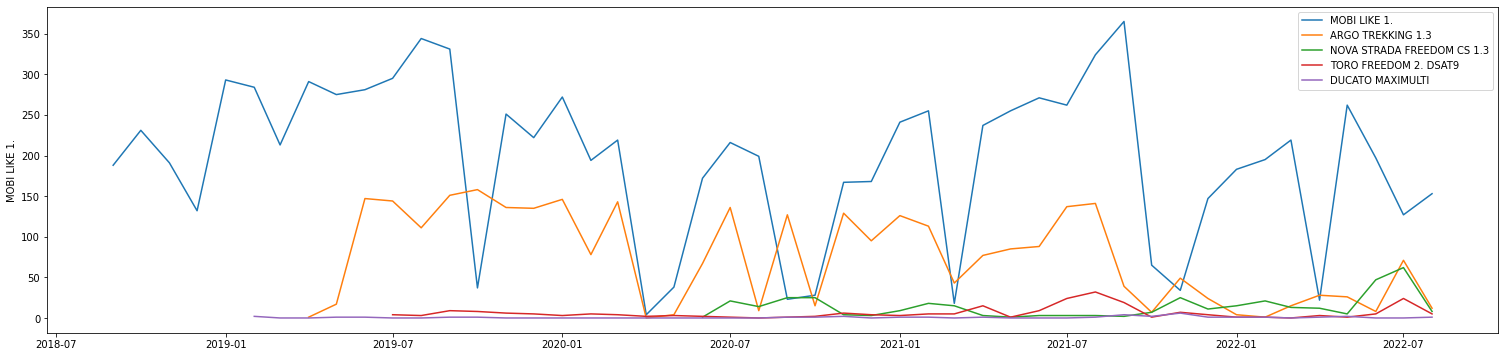

In [23]:
plt.figure( figsize=(26,6))

sns.lineplot( x=df.index, y=df[ df.columns[ 0 ] ], label=df.columns[ 0 ] )
sns.lineplot( x=df.index, y=df[ df.columns[ 5 ] ], label=df.columns[ 5 ] )
sns.lineplot( x=df.index, y=df[ df.columns[ 10 ] ], label=df.columns[ 10 ] )
sns.lineplot( x=df.index, y=df[ df.columns[ 15 ] ], label=df.columns[ 15 ] )
sns.lineplot( x=df.index, y=df[ df.columns[ 20 ] ], label=df.columns[ 20 ] )

plt.legend()

plt.show()

In [24]:
df.columns

Index(['MOBI LIKE 1.', 'FIORINO 1.4 FLEX', 'CRONOS DRIVE 1.3', 'ARGO DRIVE 1.',
       'PULSE IMPETUS TF2 CVT', 'ARGO TREKKING 1.3', 'TORO RANCH 2. D AT9',
       'TORO VOLCANO 2. DSAT9', 'ARGO 1.', 'DUCATO CHASSI L',
       'NOVA STRADA FREEDOM CS 1.3', 'NOVA STRADA VOLCANO CD 1.3CVT',
       'ARGO DRIVE 1.3', 'CRONOS 1.3', 'TORO ULTRA 2. DS AT9',
       'TORO FREEDOM 2. DSAT9', 'MOBI TREKKING 1.',
       'NOVA STRADA ENDURANCE 1.4', 'TORO VOLCANO 1.3T AT6',
       'TORO FREEDOM 1.3T AT6', 'DUCATO MAXIMULTI',
       'NOVA STRADA FREEDOM CD 1.3', 'TORO ENDURANCE 1.3T AT6',
       'PULSE AUDACE 1.T CVT', 'PULSE DRIVE 1.T CVT', 'PULSE DRIVE 1.3 CVT',
       'PULSE 1.3 MT', 'NOVA STRADA RANCH CD 1.3CVT'],
      dtype='object')

# Predict

In [25]:
produto = df.columns[0]

model = pm.auto_arima(df[produto], seasonal=True, m=4)

print(model.summary())



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -285.014
Date:                Mon, 10 Oct 2022   AIC                            576.027
Time:                        18:55:12   BIC                            581.641
Sample:                    09-01-2018   HQIC                           578.149
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    195.3984     20.581      9.494      0.000     155.060     235.736
ma.L1          0.2865      0.138      2.080      0.038       0.017       0.556
sigma2      8399.3709   2317.474      3.624      0.0

In [26]:
fc, conf_int = model.predict(n_periods=5, return_conf_int=True)
print(fc, conf_int)

2022-09-01    188.107369
2022-10-01    195.398357
2022-11-01    195.398357
2022-12-01    195.398357
2023-01-01    195.398357
Freq: MS, dtype: float64 [[  8.48042942 367.73430771]
 [  8.54595036 382.25076355]
 [  8.54595036 382.25076355]
 [  8.54595036 382.25076355]
 [  8.54595036 382.25076355]]


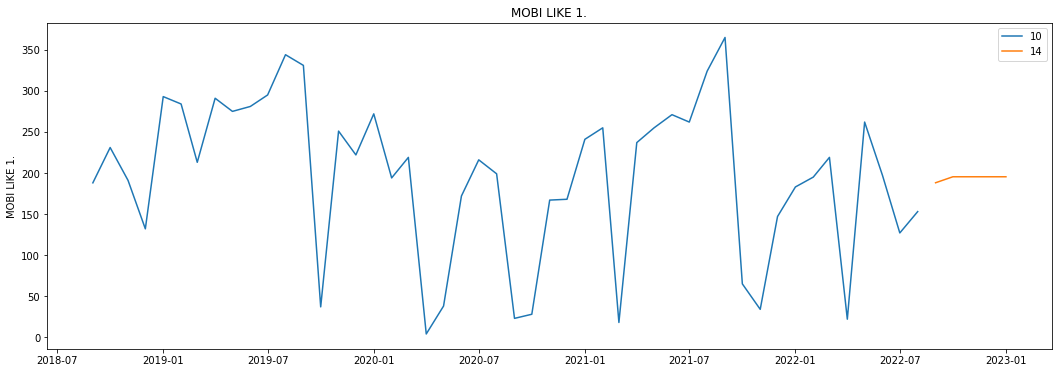

In [27]:
plt.figure( figsize=(18,6))

sns.lineplot( x=df.index, y=df[PRODUTO], label=10 )
sns.lineplot( x=fc.index, y=fc.values, label=14 )
plt.title( produto )
plt.legend()

plt.show()

# Download tables

In [28]:
df.to_csv('fiat_base_reshaped.csv')
df_AIC.to_csv('fiat_base_AIC.csv',index=None)

In [29]:
df = pd.read_csv('fiat_base_reshaped.csv',index_col=0)
df.head()

,MOBI LIKE 1.,FIORINO 1.4 FLEX,CRONOS DRIVE 1.3,ARGO DRIVE 1.,PULSE IMPETUS TF2 CVT,ARGO TREKKING 1.3,TORO RANCH 2. D AT9,TORO VOLCANO 2. DSAT9,ARGO 1.,DUCATO CHASSI L,...,TORO VOLCANO 1.3T AT6,TORO FREEDOM 1.3T AT6,DUCATO MAXIMULTI,NOVA STRADA FREEDOM CD 1.3,TORO ENDURANCE 1.3T AT6,PULSE AUDACE 1.T CVT,PULSE DRIVE 1.T CVT,PULSE DRIVE 1.3 CVT,PULSE 1.3 MT,NOVA STRADA RANCH CD 1.3CVT
2018-09-01,188.0,58.0,1.0,118.0,NaN,NaN,1.0,27.0,169.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-01,231.0,66.0,95.0,14.0,NaN,NaN,1.0,3.0,15.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-01,191.0,75.0,64.0,155.0,NaN,NaN,5.0,19.0,142.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-01,132.0,56.0,69.0,12.0,NaN,NaN,6.0,1.0,86.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01,293.0,124.0,64.0,119.0,NaN,NaN,6.0,23.0,25.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_AIC = pd.read_csv('fiat_base_AIC.csv',index_col=0)
df_AIC.head()

,AIC
produto,
ARGO TREKKING 1.3,434.519890
NOVA STRADA VOLCANO CD 1.3CVT,303.756351
ARGO DRIVE 1.3,430.601577
ARGO 1.,510.018964
DUCATO CHASSI L,189.128383


In [31]:
from google.colab import files

files.download('fiat_base_reshaped.csv')
files.download('fiat_base_AIC.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>